In [6]:
#Import Basic packages
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import sklearn
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [5]:
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32920 sha256=46d207320a4de03901b6119722efef1a4b7fa1d37c284b88b05c389b5986bc21
  Stored in directory: c:\users\yorkf\appdata\local\pip\cache\wheels\fb\86\b2\277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


You should consider upgrading via the 'c:\users\yorkf\anaconda3\python.exe -m pip install --upgrade pip' command.


In [38]:
df = pd.read_csv('Combined_News_DJIA.csv')
df.head(10)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [45]:
cols = ['Top1','Top2','Top3', 'Top4','Top5', 'Top6','Top7', 'Top8','Top9', 'Top10',
                             'Top11', 'Top12','Top13', 'Top14','Top15', 'Top16','Top17', 'Top18','Top19', 'Top20',
                             'Top21', 'Top22','Top23', 'Top24','Top25']
df['Combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df.head(10)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P.

In [59]:
print(df.Combined[0])

b"Georgia 'downs two Russian warplanes' as countries move to brink of war"_b'BREAKING: Musharraf to be impeached.'_b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)'_b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'_b"Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing"_b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.'_b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side"_b"The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."_b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]'_b'Did the U.S. Prep Georgia for War with Russia?'_b'Rice Gives Green 

# Sentiment Analysis

In [30]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity
def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']

def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [49]:
df['tb_polarity'] = df['Combined'].apply(detect_tb_polarity)
df['tb_subjectivity'] = df['Combined'].apply(detect_tb_subjectivity)

vader = SentimentIntensityAnalyzer()
df['vader_pos'] = df['Combined'].apply(detect_vader_pos)
df['vader_neg'] = df['Combined'].apply(detect_vader_neg)
df['vader_comp'] = df['Combined'].apply(detect_vader_comp)

In [51]:
df.head(10)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Combined,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",-0.048568,0.267549,0.062,0.214,-0.9966
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,0.121956,0.374806,0.092,0.135,-0.9075
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...,-0.046530,0.518785,0.056,0.139,-0.9739
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...,0.011398,0.364021,0.048,0.146,-0.9842
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,b'All the experts admit that we should legalis...,0.040677,0.375099,0.093,0.174,-0.9774
5,2008-08-15,1,"b""Mom of missing gay man: Too bad he's not a 2...","b""Russia: U.S. Poland Missile Deal Won't Go 'U...","b""The government has been accused of creating ...",b'The Italian government has lashed out at an ...,b'Gorbachev: Georgia started conflict in S. Os...,"b""China fakes more than your girlfriend; 'Ethn...","b""The UN's criticism o

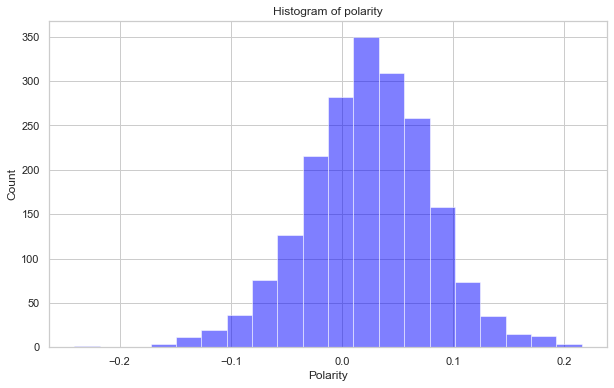

In [50]:
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.tb_polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

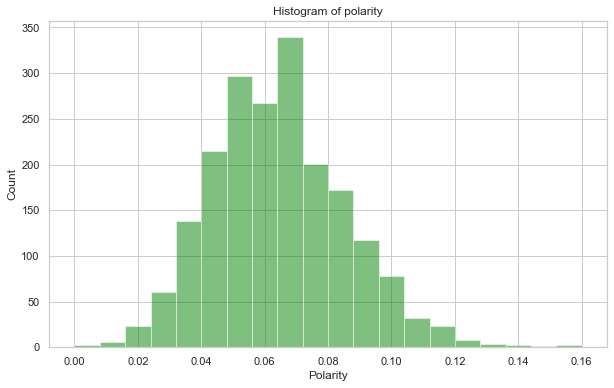

In [56]:
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.vader_pos, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

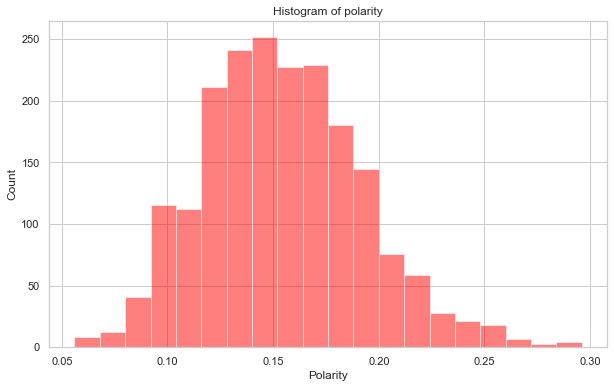

In [57]:
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.vader_neg, num_bins, facecolor='red', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

In [60]:
df.to_csv(r'C:/Users/yorkf/Desktop/MSBA/NLP/Project/News_sentiment.csv',index= False, header =True)

# Topic Modeling

In [ ]:
!pip install spacy
!pip install pyLDAvis
!python -m spacy download en_core_web_sm

In [21]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','b'])

In [23]:
# Import Dataset
df = pd.read_csv('RedditNews.csv')
print(df.News.unique())
df.head()

['A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.'
 'IMF chief backs Athens as permanent Olympic host'
 'The president of France says if Brexit won, so can Donald Trump' ...
 "b'Angst in Ankara: Turkey Steers into a Dangerous Identity Crisis'"
 'b"UK: Identity cards \'could be used to spy on people\' and a new children\'s database may be used to identify likely future criminals. Has covert surveillance gone too far?"'
 "b'Marriage, they said, was reduced to the status of a commercial transaction in which women could be discarded by husbands claiming to have discovered hidden defects in them.'"]


,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [24]:
# Convert to list
data = df.News.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['A 117-year-old woman in Mexico City finally received her birth certificate, '
 'and died a few hours later. Trinidad Alvarez Lira had waited years for proof '
 'that she had been born in 1898.']


In [25]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['year', 'old', 'woman', 'in', 'mexico', 'city', 'finally', 'received', 'her', 'birth', 'certificate', 'and', 'died', 'few', 'hours', 'later', 'trinidad', 'alvarez', 'lira', 'had', 'waited', 'years', 'for', 'proof', 'that', 'she', 'had', 'been', 'born', 'in']]


In [26]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['year_old', 'woman', 'in', 'mexico', 'city', 'finally', 'received', 'her', 'birth_certificate', 'and', 'died', 'few', 'hours', 'later', 'trinidad', 'alvarez', 'lira', 'had', 'waited', 'years', 'for', 'proof', 'that', 'she', 'had', 'been', 'born', 'in']


In [27]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [28]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['finally', 'receive', 'birth_certificate', 'die', 'hour', 'later', 'wait', 'year', 'proof', 'bear']]


In [29]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [30]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [31]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.040*"oil" + 0.031*"leader" + 0.021*"accuse" + 0.019*"bomb" + 0.017*"turn" '
  '+ 0.016*"activist" + 0.015*"work" + 0.015*"know" + 0.015*"free" + '
  '0.014*"future"'),
 (1,
  '0.051*"woman" + 0.034*"troop" + 0.025*"want" + 0.023*"face" + '
  '0.021*"torture" + 0.021*"russian" + 0.020*"admit" + 0.019*"charge" + '
  '0.016*"back" + 0.016*"girl"'),
 (2,
  '0.037*"claim" + 0.036*"die" + 0.033*"strike" + 0.028*"help" + 0.019*"fear" '
  '+ 0.017*"keep" + 0.016*"beat" + 0.016*"family" + 0.015*"conflict" + '
  '0.014*"terrorism"'),
 (3,
  '0.063*"world" + 0.036*"country" + 0.031*"get" + 0.024*"tell" + 0.022*"warn" '
  '+ 0.022*"bus" + 0.019*"food" + 0.018*"hold" + 0.016*"last" + 0.015*"drug"'),
 (4,
  '0.079*"say" + 0.045*"attack" + 0.025*"take" + 0.023*"call" + 0.021*"make" + '
  '0.018*"terrorist" + 0.017*"official" + 0.015*"law" + 0.013*"missile" + '
  '0.012*"end"'),
 (5,
  '0.072*"kill" + 0.050*"people" + 0.037*"war" + 0.032*"police" + 0.027*"dead" '
  '+ 0.026*"arrest" + 0.025*

In [32]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.176245877773175

Coherence Score:  0.24166233555989675


In [33]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\yorkf\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.390619 -0.100099       1        1  14.309579
8      0.065379  0.408515       2        1  12.418235
5      0.077077 -0.123293       3        1  11.723826
1     -0.050636 -0.059914       4        1   9.916877
6     -0.143440 -0.093294       5        1   9.856533
9     -0.088486 -0.039456       6        1   9.808238
0     -0.017402  0.036527       7        1   9.456300
3     -0.087625 -0.028990       8        1   8.757290
2     -0.078707 -0.007006       9        1   6.950870
7     -0.066778  0.007008      10        1   6.802258, topic_info=     Category         Freq      Term        Total  loglift  logprob
14    Default  6292.000000       say  6292.000000  30.0000  30.0000
69    Default  4685.000000      kill  4685.000000  29.0000  29.0000
9     Default  3246.000000      year  3246.000000  28.0000  28.0000
194   Default  3072.000000     world  3072.000000  27.0000  27.0000
114   Default  3256.000000    people  3256.000000  26.0000  26.0000
...       ...          ...       ...          ...      ...      ...
452   Topic10   304.729431     drive   306.051178   2.6836  -4.8254
1610  Topic10   299.307281      leak   300.629272   2.6835  -4.8433
667   Topic10   290.577789  genocide   291.899780   2.6834  -4.8729
146   Topic10   255.001892    accord   256.323792   2.6827  -5.0035
598   Topic10   248.511444     paper   249.833435   2.6826  -5.0293

[330 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
222       6  0.996424     abuse
146      10  0.994835    accord
142       7  0.998779    accuse
166       7  0.998324  activist
798       4  0.999160     admit
...     ...       ...       ...
194       8  0.999600     world
195       2  0.999406     would
9         5  0.999488      year
66        4  0.997956  year_old
790       6  0.997320     young

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 6, 2, 7, 10, 1, 4, 3, 8])